In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

###COST FUNCTION AND GRADIENT DESCENT FOR LINEAR REGRESSION

In [ ]:
dataset = pd.read_csv('/content/advertising.csv')


X = dataset[['Radio']].values
y = dataset[['Sales']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

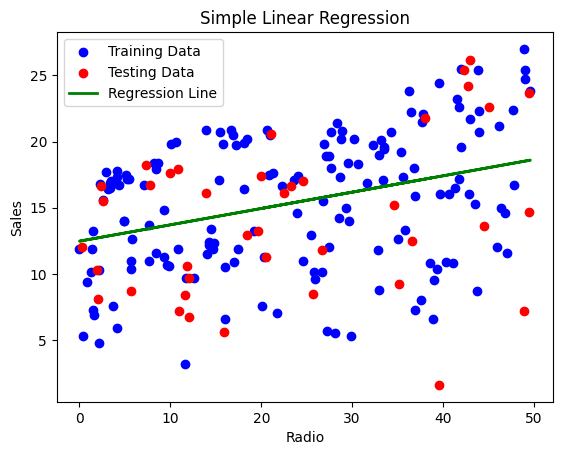

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, lin_reg.predict(X_train), color='green', linewidth=2, label='Regression Line')

plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:  # Print every 100 iterations
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

In [ ]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
theta = np.zeros((X_train_bias.shape[1], 1))
alpha = 0.0001
iterations = 200
theta_optimal, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, iterations)


Iteration 0: Cost = 116.62300169885641
Iteration 100: Cost = 33.22338149681754


In [ ]:
y_pred_gd = X_test_bias.dot(theta_optimal)


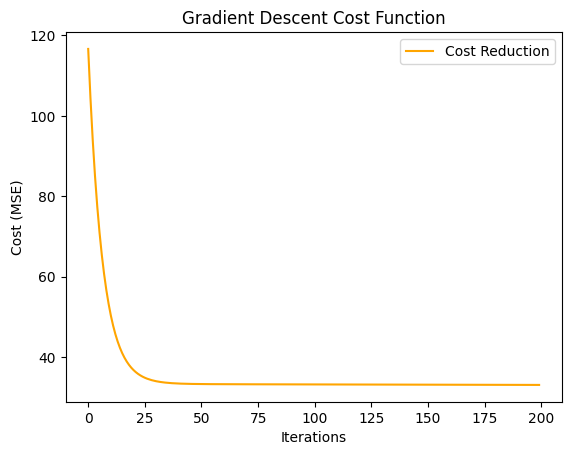

In [ ]:
plt.plot(range(iterations), cost_history, color='orange', label="Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function")
plt.legend()
plt.show()

###COST FUNCTION AND GRADIENT DESCENT FOR MULTI REGRESSION

In [ ]:
dataset = pd.read_csv('/content/advertising.csv')

In [ ]:
X = dataset[['TV','Radio','Newspaper']].values
y = dataset['Sales'].values.reshape(-1, 1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

In [ ]:
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

Iteration 0: Cost = 128.30708175489835
Iteration 100: Cost = 17.365491076930578
Iteration 200: Cost = 3.2286256394510633
Iteration 300: Cost = 1.4067864793161085
Iteration 400: Cost = 1.1697529693271005
Iteration 500: Cost = 1.1385759393104287
Iteration 600: Cost = 1.134409152097101
Iteration 700: Cost = 1.1338372012200975
Iteration 800: Cost = 1.133755030952516
Iteration 900: Cost = 1.1337423238921756


In [ ]:
y_pred = X_test.dot(theta_optimal)

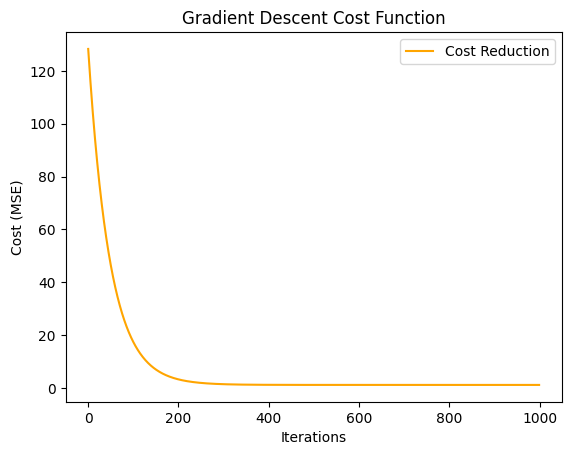

In [ ]:
plt.plot(range(iterations), cost_history,  color='orange', label="Cost Reduction")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function")
plt.legend()
plt.show()

In [ ]:
print("Optimized Theta (Weights):", theta_optimal.flatten())

Optimized Theta (Weights): [15.15316774  4.59699446  1.65091683 -0.07549332]
